In [1]:
install.packages("datasets")
install.packages("cluster")
install.packages("tidyverse")
install.packages("corrplot")
install.packages("gridExtra")
install.packages("GGally")


library(datasets) # USArrests
library(cluster)
library(tidyverse)
library(corrplot)
library(gridExtra)
library(GGally)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────

ERROR: ignored

### Seção 1

In [2]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [3]:
# Há dados faltantes aqui? 
#
any(is.na(USArrests))

[1] FALSE

In [4]:
# H� dados N�O num�ricos aqui? 
#
any(as.logical(sapply(USArrests, is.numeric )-1))

[1] FALSE

In [5]:
# Scale data: diferentemente dos processos de classifica��o (aprendizado supervisionado)
# � importante aplicar-se algum tipo normaliza��o os dados dos dados 
#
# A fun��o scale( ) normaliza todos os valores com centro=0 (media) e variancia=1   
#
mydata = data.frame(scale(USArrests))
summary(mydata)
sapply(mydata,median) # cuidado com o nr de zeros!
sapply(mydata,var)

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

Murder     Assault    UrbanPop        Rape 
-0.12352171 -0.14111267  0.03177945 -0.12085773

Murder  Assault UrbanPop     Rape 
       1        1        1        1

## Seção 2

#### 2.1

In [6]:
RNGversion("3.5.2")
set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
wss = 0
bss = 0
for (i in 1:10) wss[i] = sum(kmeans(mydata,i, nstart=25)$withinss) 
for (i in 1:10) bss[i] = sum(kmeans(mydata,i, nstart=25)$betweenss)

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”


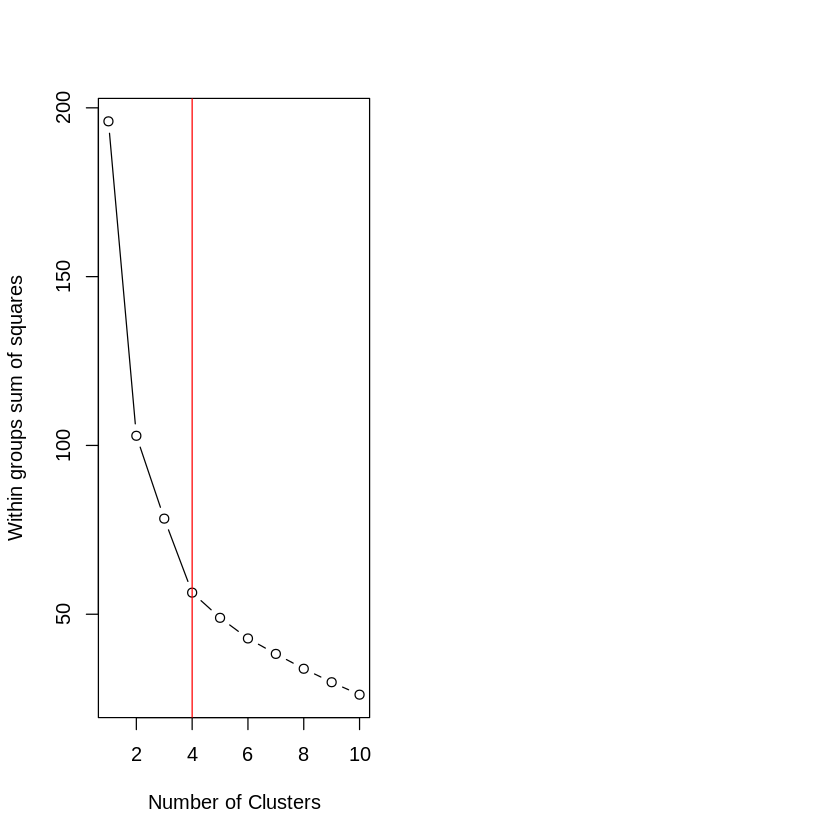

In [7]:
par(mfrow=c(1,2)) 
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
# Voce s� poder� definir o valor abaixo depois de inspecionar no gr�fico acima
# o ponto de cotovelo
abline(v=4,col="red")

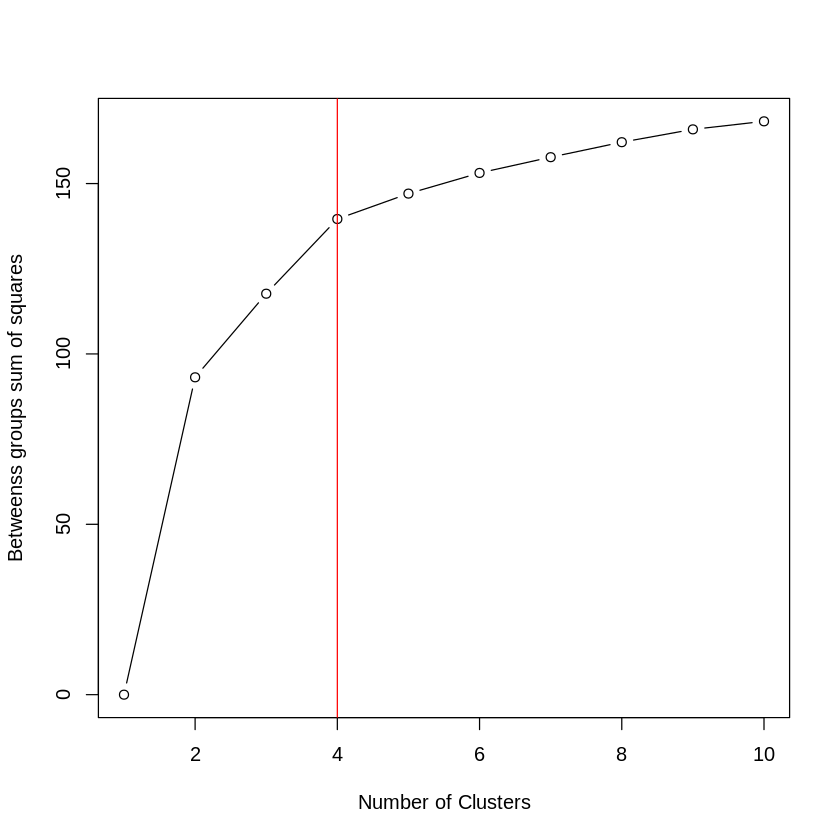

In [8]:
plot(1:10, bss, type="b", xlab="Number of Clusters", ylab="Betweenss groups sum of squares")
# Voce s� poder� definir o valor abaixo depois de inspecionar no gr�fico acima
# o ponto de cotovelo
abline(v=4,col="red")

In [12]:
help(kmeans)

In [15]:
# 
# consulte o help(kmeans) e empregue a fun��o para responder a Q2  
fit = kmeans(mydata, 4, nstart=25) 
fit

K-means clustering with 4 clusters of sizes 8, 16, 13, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.4894375 -0.3826001  0.5758298 -0.26165379
3  0.6950701  1.0394414  0.7226370  1.27693964
4 -0.9615407 -1.1066010 -0.9301069 -0.96676331

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              3              3              1              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              4              3              2              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              4              1              4              3 
 Massachusetts       Michigan      Minnesota    Mississippi    

#### 2.2

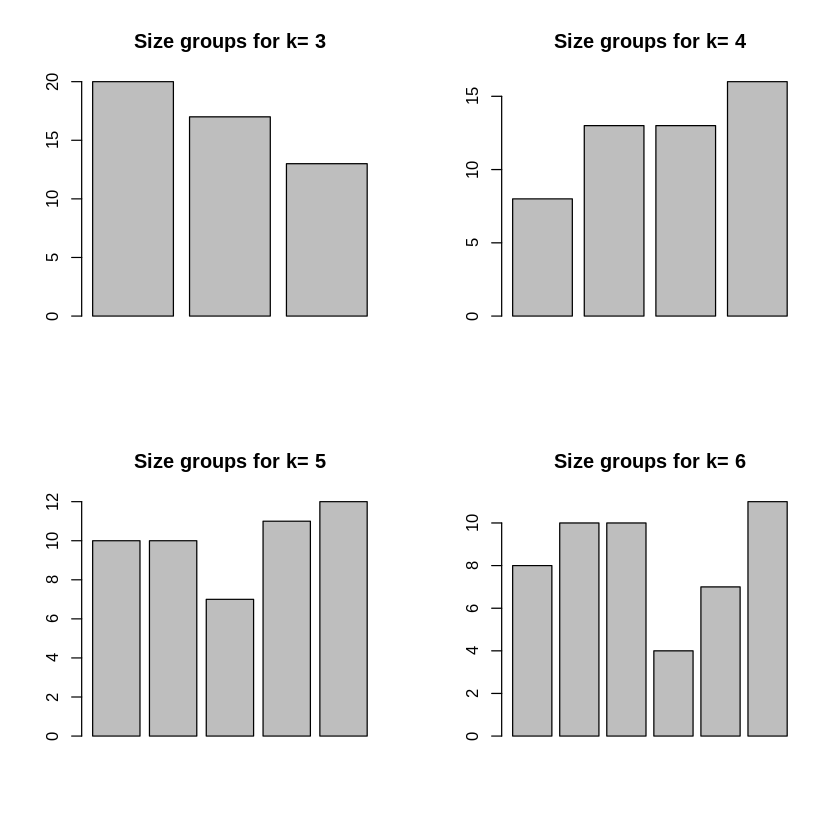

In [16]:
set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
par(mfrow=c(2,2))
for (i in 3:6){
  fit <- kmeans(mydata,i, nstart=25)
  main_ = paste("Size groups for k=", i)
  barplot(fit$size, main = main_ )
}  

In [26]:
# 
# consulte o help(kmeans) e empregue a fun��o para responder a Q3  
fit = kmeans(mydata, 4, nstart=25) 
fit$"size"
#

[1] 13  8 13 16

#### 2.3 Silhouette Method

In [27]:
set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
ss_m = c(0)
for (i in 3:10){
  fit <- kmeans(mydata,  i, nstart=25)
  ss <- silhouette(fit$cluster, dist(mydata))
  ss_m[i] <-  mean(ss[,3])
}

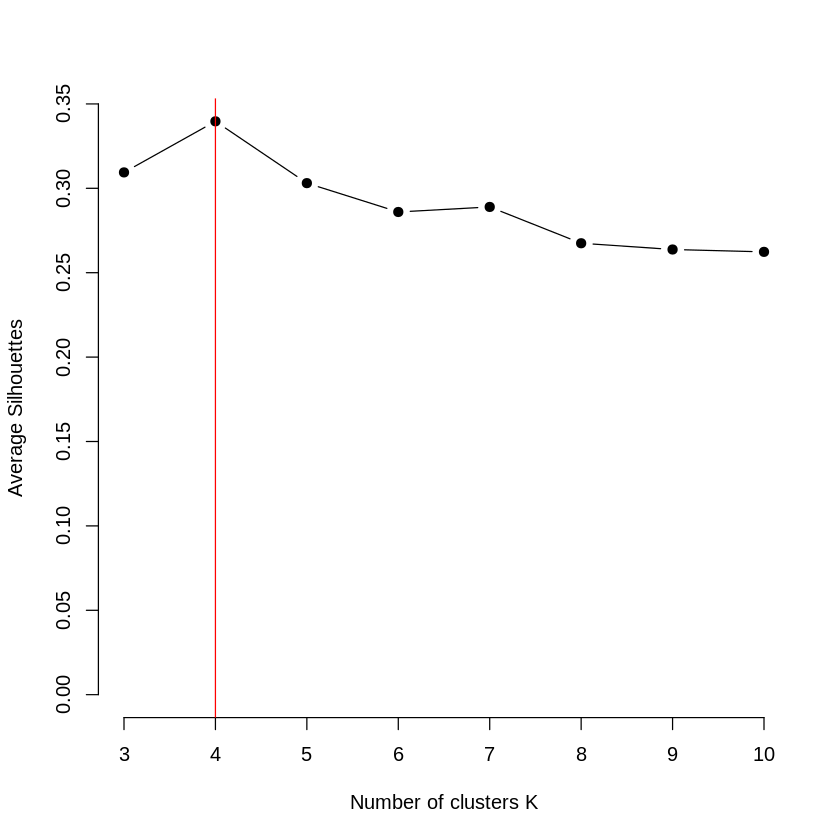

In [28]:
par(mfrow=c(1,1))
plot(ss_m,
     type = "b", pch = 19, frame = FALSE, 
     xlab = "Number of clusters K",
     ylab = "Average Silhouettes",
     xlim=c(3,10))
# Voce s� poder� definir o valor abaixo depois de inspecionar no gr�fico acima
# o ponto de cotovelo
abline(v=4,col="red")

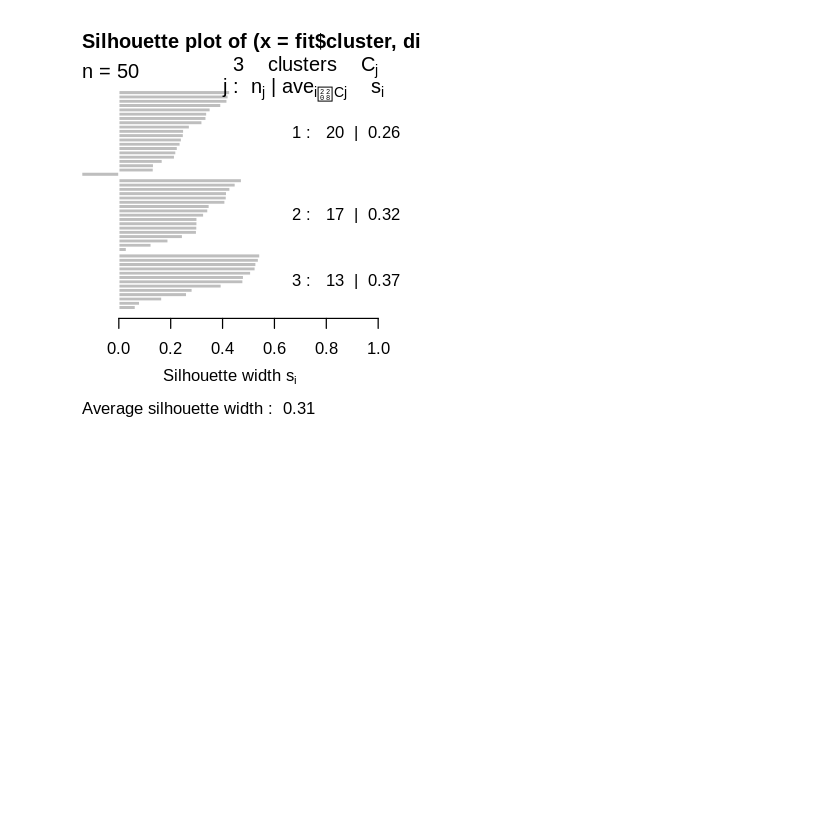

In [29]:
set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
par(mfrow=c(2,2))
fit <- kmeans(mydata,  3, nstart=25)
ss <- silhouette(fit$cluster, dist(mydata))
plot(ss)


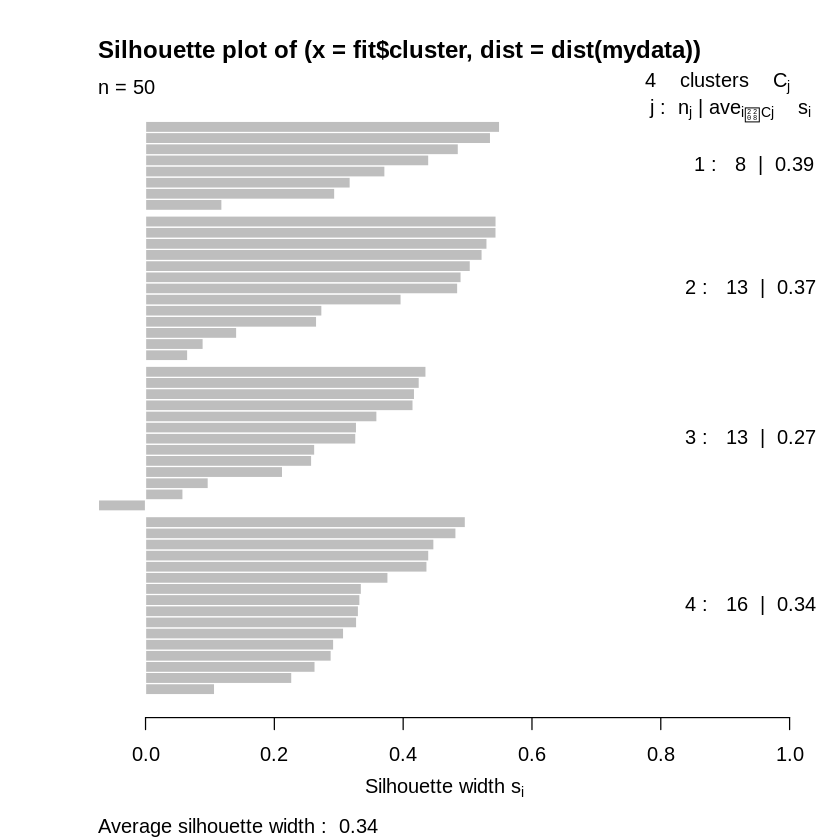

In [30]:
fit <- kmeans(mydata,  4, nstart=25)
ss <- silhouette(fit$cluster, dist(mydata))
plot(ss)

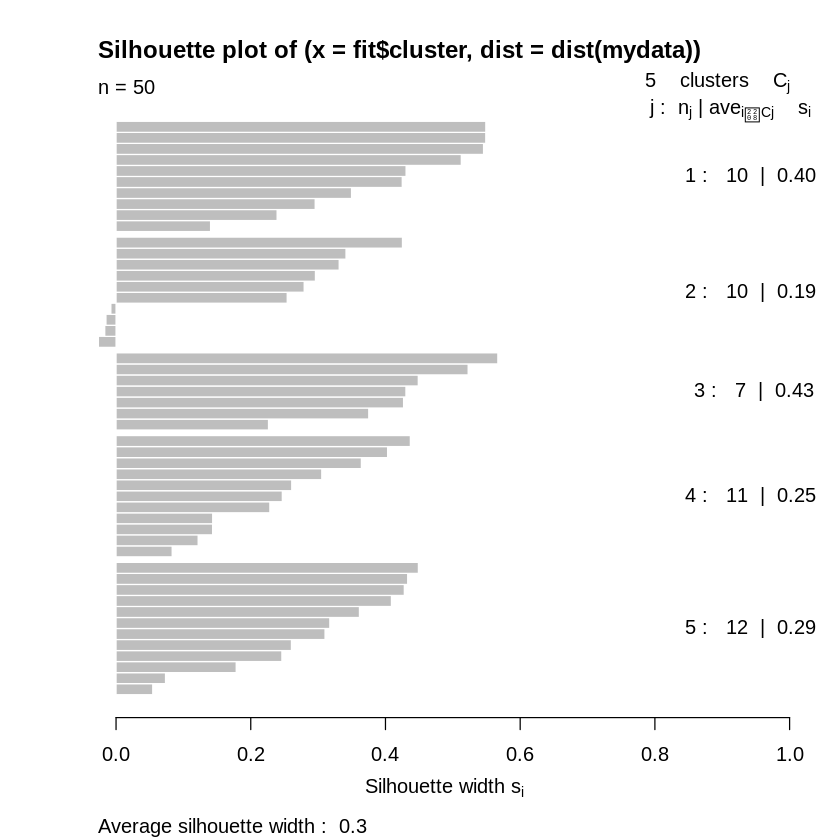

In [31]:
fit <- kmeans(mydata,  5, nstart=25)
ss <- silhouette(fit$cluster, dist(mydata))
plot(ss)

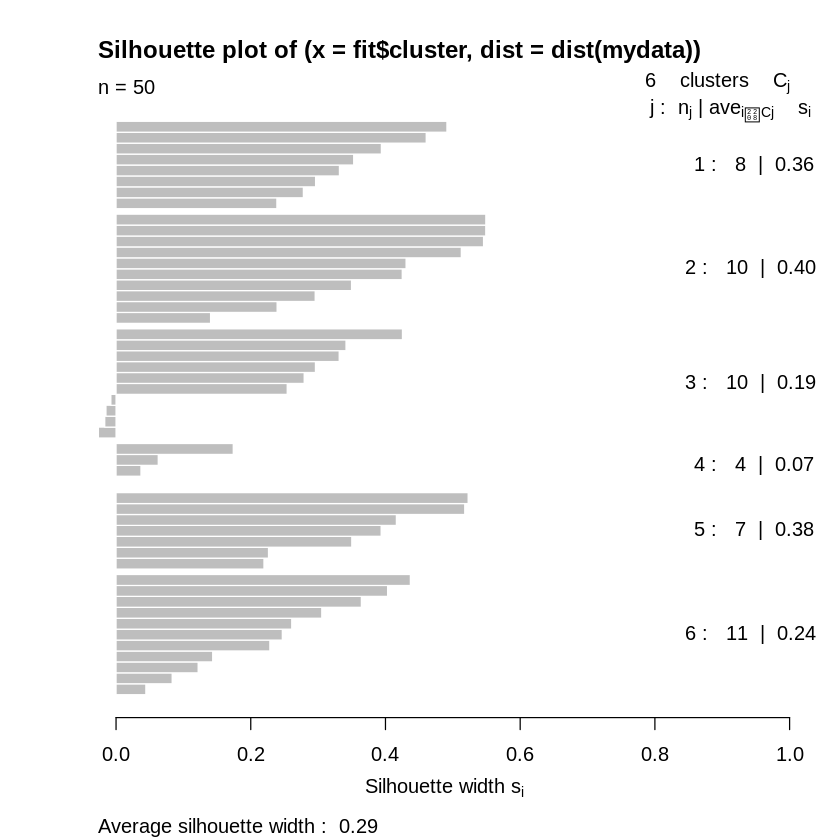

In [32]:
fit <- kmeans(mydata,  6, nstart=25)
ss <- silhouette(fit$cluster, dist(mydata))
plot(ss)


In [33]:
mean(0.29, 0.3, 0.34, 0.31)

[1] 0.29

## Seção 3

[1] 0.3396889

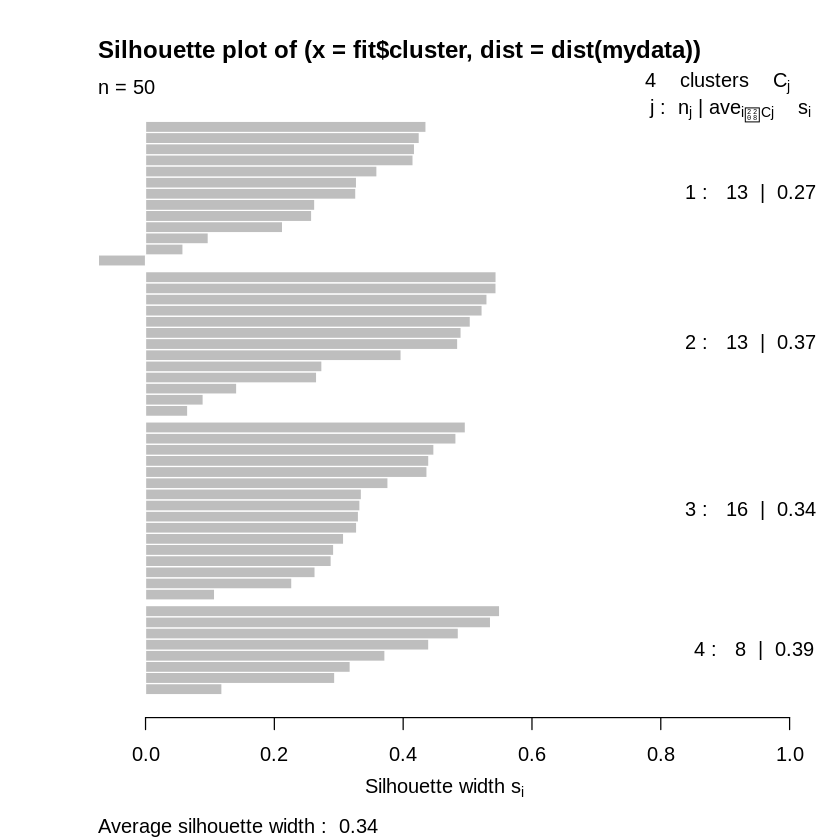

In [34]:
set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
fit <- kmeans(mydata,4, nstart=25)

par(mfrow=c(1, 1))
ss <- silhouette(fit$cluster, dist(mydata))
plot(ss)
mean(ss[,3])

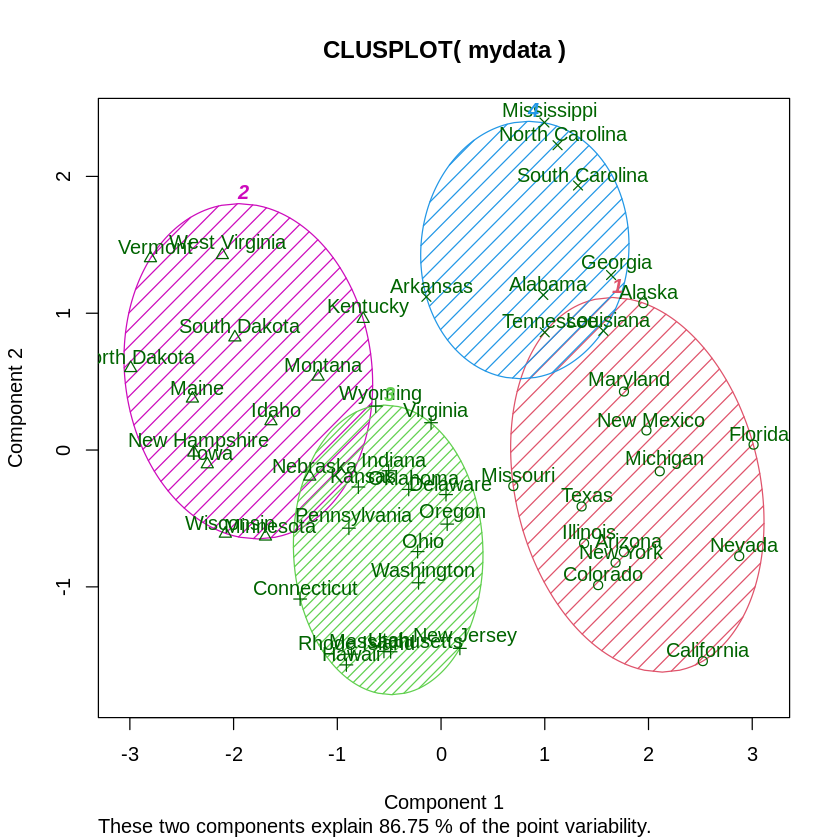

In [35]:
# 
# a. Visualizando o Cluster para os Dois Componentes Principais
# (voc� vai conhecer mais sobre componente principais na pr�xima trilha)
#

par(mfrow=c(1, 1))
clusplot(mydata, fit$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

In [36]:
# library(fpc) 
# voc� pode ignorar se encontrar a msg 
# Error: could not find function "plotcluster"
#
plotcluster(mydata, fit$cluster)

ERROR: ignored

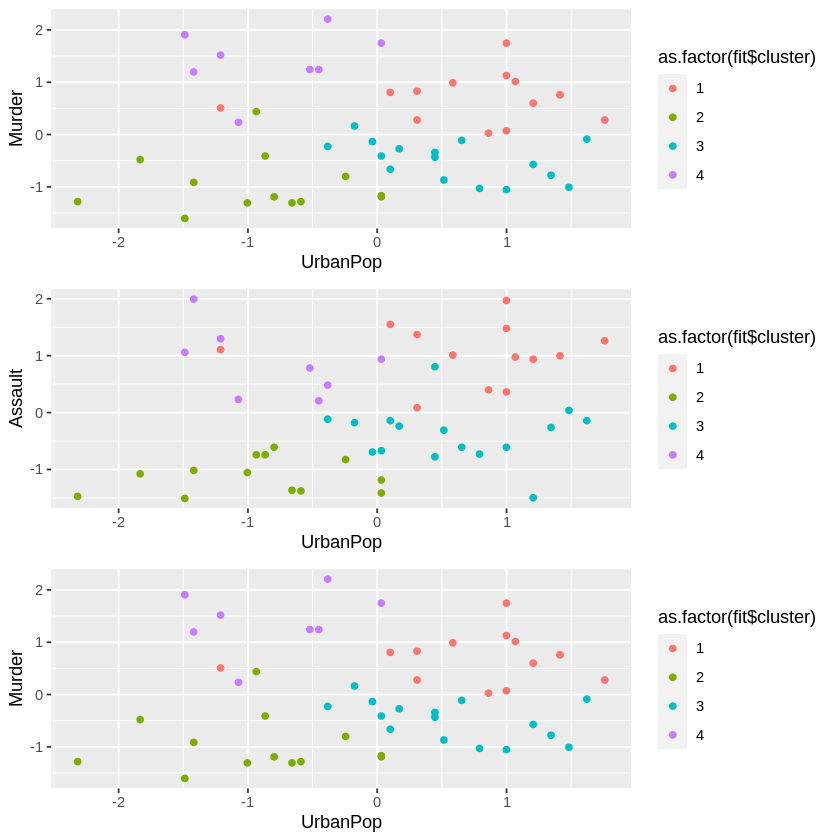

In [37]:
# 
# b. Visualizando o Cluster para Duas vari�veis de sua escolha 
#

p1 = ggplot(mydata, aes(UrbanPop, Murder, color = as.factor(fit$cluster))) + geom_point()
p2 = ggplot(mydata, aes(UrbanPop, Assault, color = as.factor(fit$cluster))) + geom_point()
p3 = ggplot(mydata, aes(UrbanPop, Murder, color = as.factor(fit$cluster))) + geom_point()

grid.arrange(p1, p2, p3)

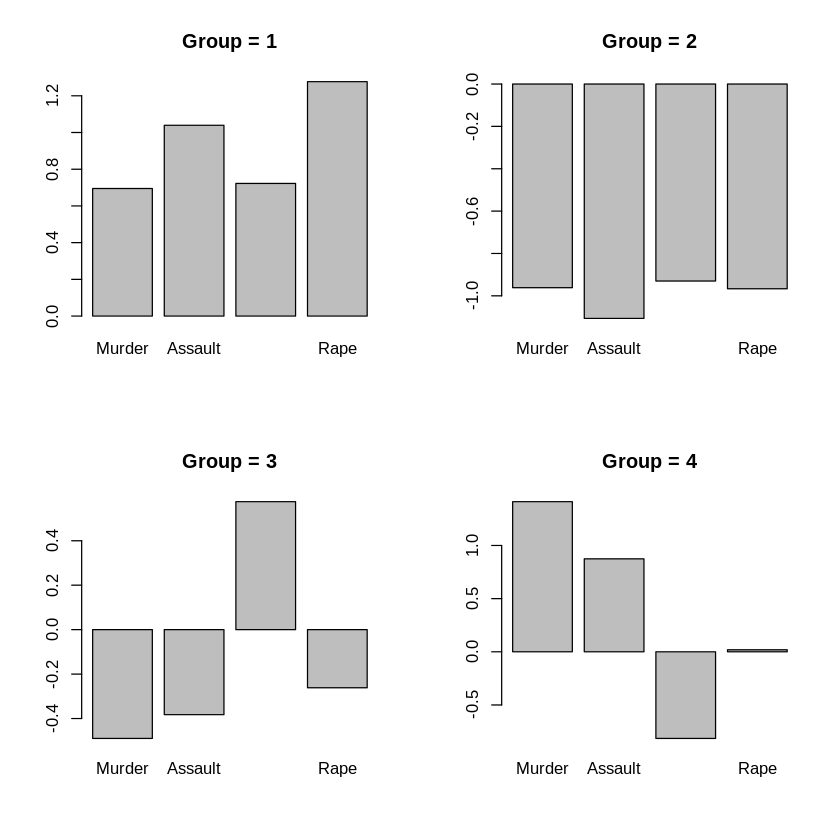

In [38]:
# 
# c. Visualizando os valores m�dios de cada Cluster 
#

mydata$predict = fit$cluster # adicionando o atributo predict

par(mfrow=c(2, 2))
for (i in 1:4){
  main_ = paste("Group =", i)
  barplot(sapply(mydata[mydata$predict==i,-5],mean),main=main_) 
}

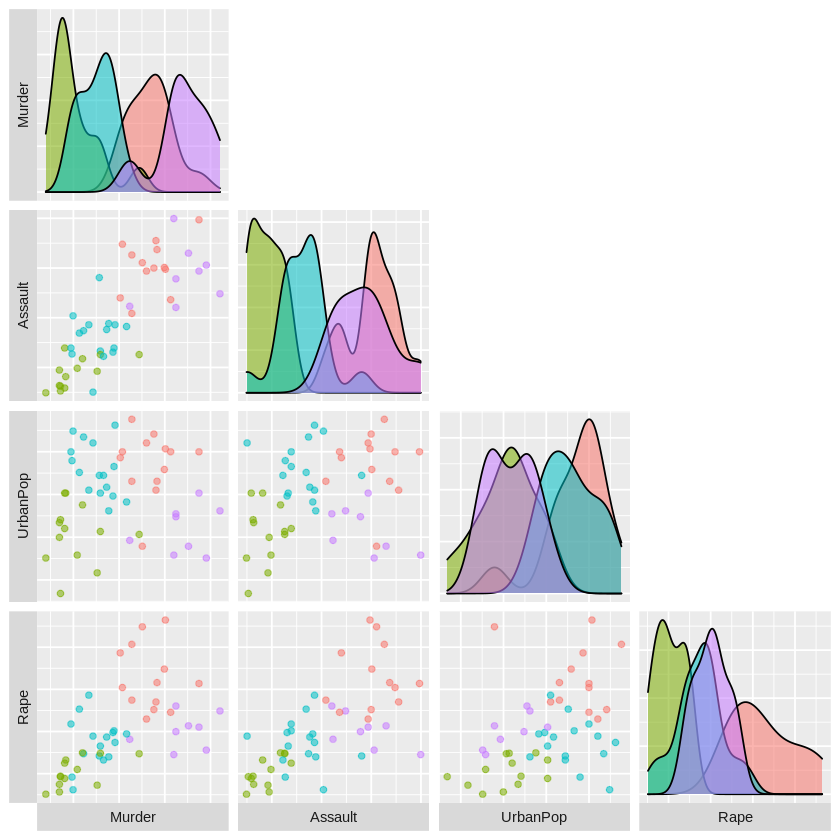

In [39]:
# 
# d. Visualizando o Cluster para a diferentes pares de vari�veis e suas distribui��es
#

ggpairs(cbind(mydata, Cluster=as.factor(fit$cluster)),
        columns=1:4, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") 


#### Seção 4

In [40]:
# para reestabelecer somente os valores de Murder, Assault, UrbanPop, Rape  
mydata_pam = mydata[,-c(5)] # retira o valor predict acrescentado anteriormente

set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
fit = pam(mydata_pam,4)


   
     1  2  3  4
  1  0  0  0  8
  2 12  0  0  0
  3  1  3 16  0
  4  0 10  0  0

[1] 0.3389904

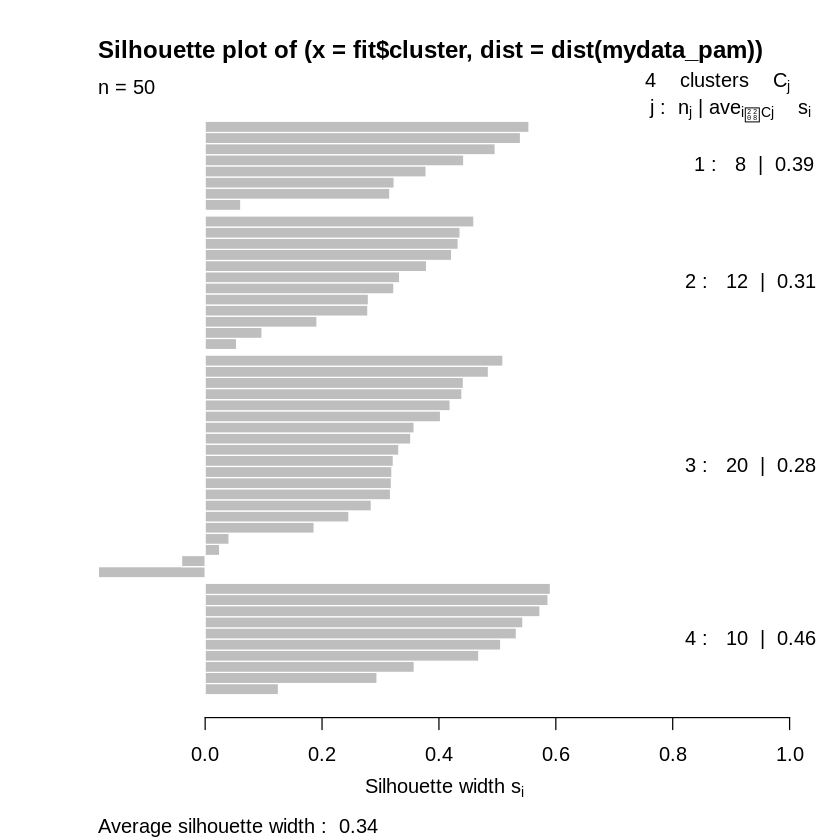

In [41]:
# Compare PAM e Kmeans
table(fit$cluster, mydata$predict)

ss <- silhouette(fit$cluster, dist(mydata_pam))

par(mfrow=c(1, 1))
plot(ss)
mean(ss[,3])

In [42]:
mean(0.39, 0.31, 0.28, 0.46)

[1] 0.39

## Seção 5

In [43]:
# para reestabelecer somente os valores de Murder, Assault, UrbanPop, Rape  
mydata_hclu = mydata[,-c(5)] # retira o valor predict acrescentado anteriormente

set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
d <- dist(mydata_hclu, method = "euclidean") # distance matrix


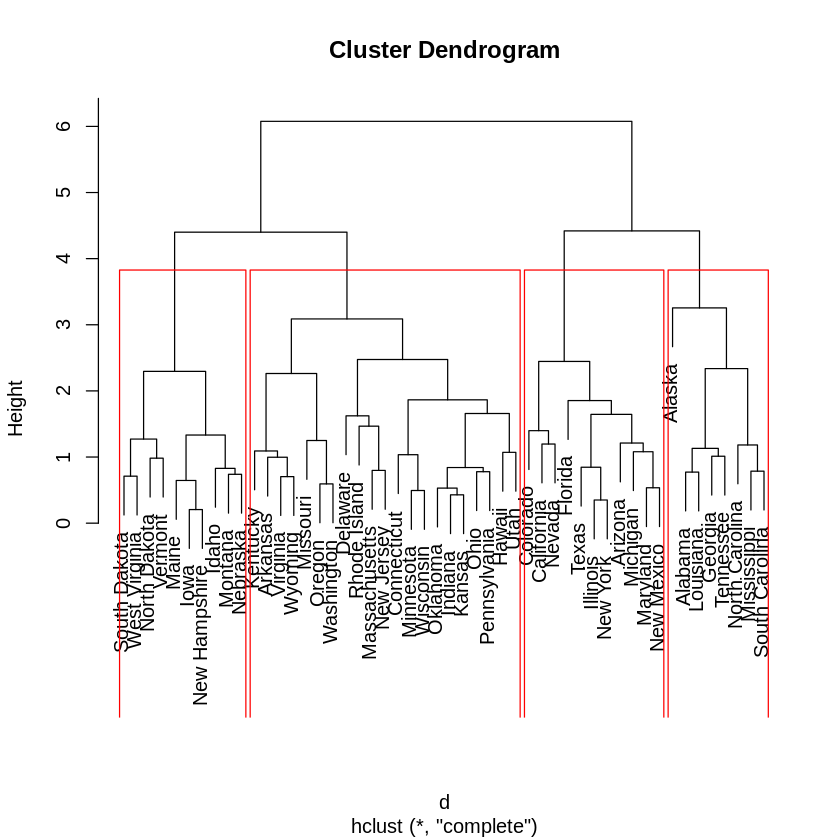

In [53]:
#    ATEN��O: altere o c�digo para escolha de um m�todo e execute um m�todo por 
#    vez escolhendo o melhor particionamento
#

fit <- hclust(d, method = "complete")                   
# fit <- hclust(d, method = "single") 
# fit <- hclust(d, method = "average")

#
#    A seguir repetem-se os mesmos procedimentos empregados para o K-m�dias: 
#    an�lise do Silhouette, Visualiza��o dos resultados e um comparativo com o PAM.


par(mfrow=c(1, 1))
plot(fit) # display dendogram

# cut tree into 4 clusters
groups <- cutree(fit, k=4) 

# draw dendogram with red borders around the 4 clusters 
rect.hclust(fit, k=4, border="red")


#### Silhuette - Q9

[1] 0.3159551

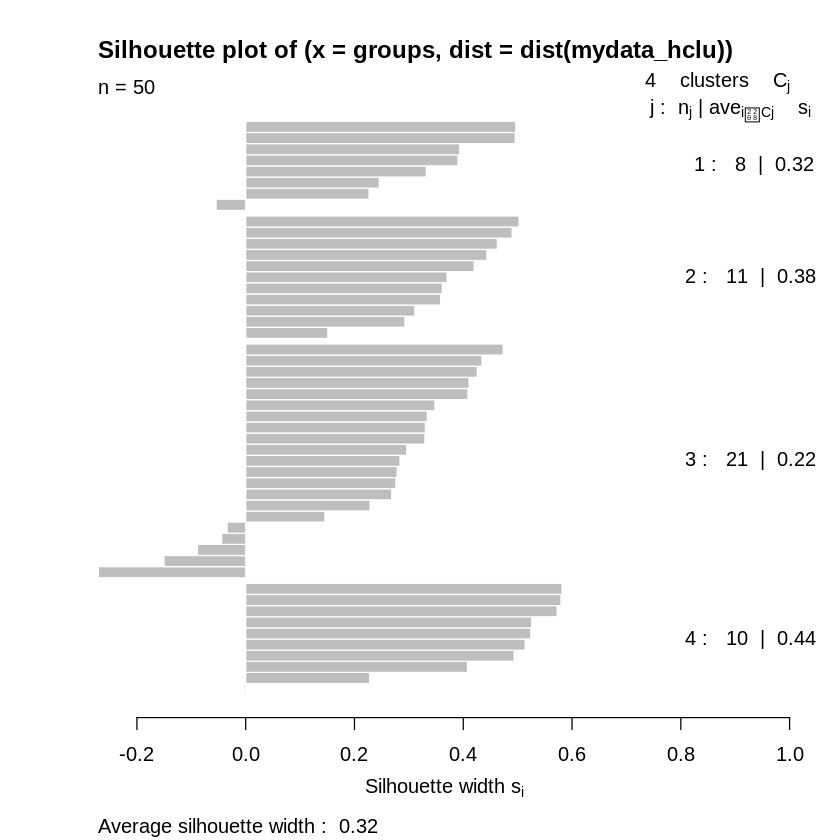

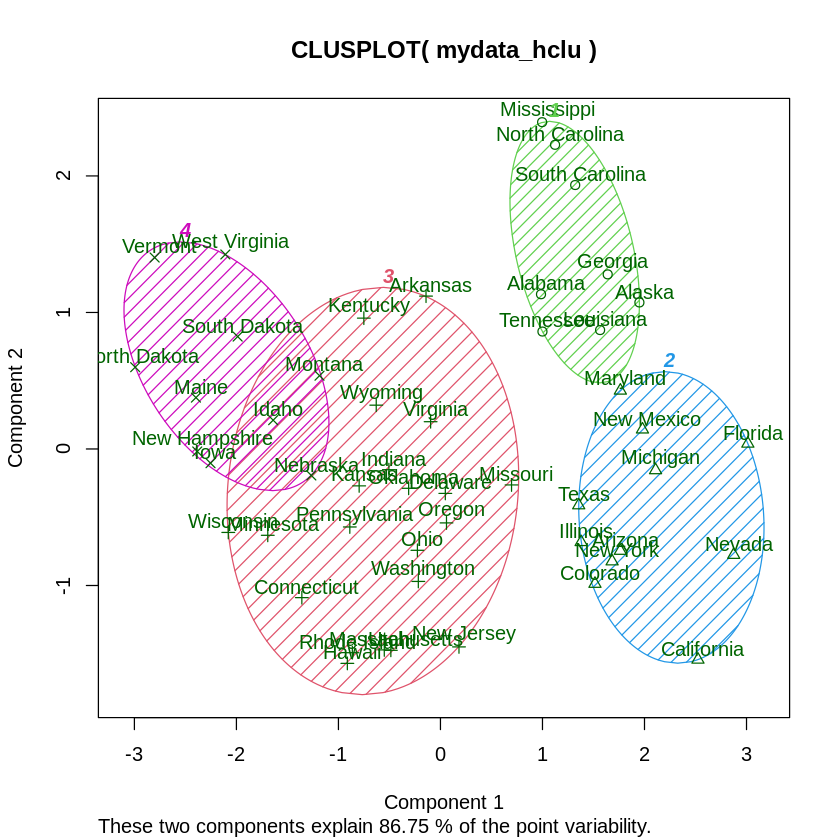

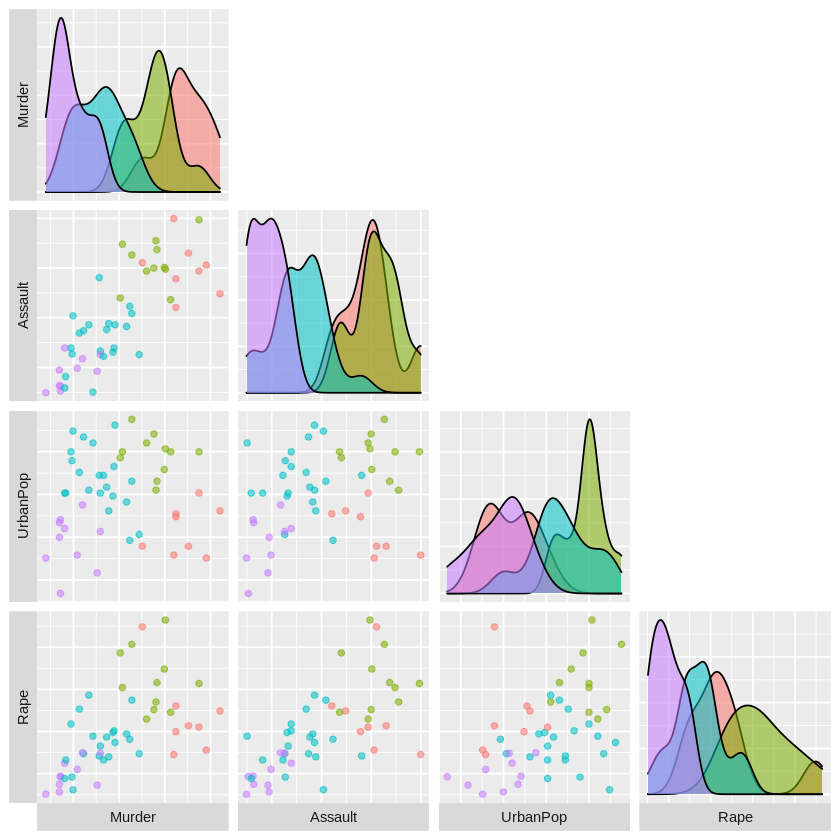

In [55]:
ss = silhouette(groups, dist(mydata_hclu))
plot(ss)
mean(ss[,3])
#
# Compare aqui agrupamentos (PAM, hclust) e (Kmeans, hclust) a 
# exemplo c�digo acima em que comparamos (PAM, Kmeans) 
#
# responda ent�o a quest�o 9
#

# o c�digo para essa quest�o n�o � fornecido

set.seed(1987)

#
# see results like kmeans 
#
par(mfrow=c(1, 1))
clusplot(mydata_hclu, groups, color=TRUE, shade=TRUE, 
         labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
# library(fpc)
# plotcluster(mydata_hclu, groups)

ggpairs(cbind(mydata_hclu, Cluster=as.factor(groups)),
        columns=1:4, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both")

### Seção 6

In [60]:
install.packages("factoextra")

library(fviz_nbclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




ERROR: ignored

In [ ]:
# 6. OUTROS M�TODOS E DISCUSS�O           Q10
# 
# Acesse help(fviz_nbclust) ou pesquise na internet sobre esse pacote 
# e execute o c�digo abaixo para os m�todos kmeans e hclust
# 

In [58]:
# para reestabelecer somente os valores de Murder, Assault, UrbanPop, Rape  
mydata = mydata[,-c(5)] # retira o valor predict acrescentado anteriormente

set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
fviz_nbclust(mydata, kmeans, method = "silhouette")

ERROR: ignored

In [ ]:
# Veja no help(fviz_nbclust) o que a fun��o abaixo faz e como alterar o
# parametro de kmeans para o cluster hierarquico (n�o � hclust! ;-) )

set.seed(1987) # n�o altere para que seu resultados correspondam ao question�rio
fviz_nbclust(mydata, FUNcluster = kmeans, method = c("silhouette", "wss",
             "gap_stat"), diss = NULL, k.max = 20, nboot = 100,
             verbose = interactive(), barfill = "steelblue", barcolor = "steelblue",
             linecolor = "steelblue", print.summary = TRUE)